<a href="https://colab.research.google.com/github/syedashraff/syedashraff/blob/main/Brain_MRI_Metastasis_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow keras opencv-python scikit-image streamlit fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [7]:
!pip install gdown
!gdown --id 1IxrLAG_YU2_53sMgOtKxJHI4gPXSwmDi -O Data.zip
!unzip Data.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1IxrLAG_YU2_53sMgOtKxJHI4gPXSwmDi

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Data.zip, Data.zip.zip or Data.zip.ZIP.


In [8]:
!gdown https://drive.google.com/uc?id=1TxrLAG_YU2_53sMgQtKxJHI4gPXSwnDi -O Data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1TxrLAG_YU2_53sMgQtKxJHI4gPXSwnDi
From (redirected): https://drive.google.com/uc?id=1TxrLAG_YU2_53sMgQtKxJHI4gPXSwnDi&confirm=t&uuid=329f7779-bee9-43db-9afd-c4b5db09ab1c
To: /content/Data.zip
100% 372M/372M [00:10<00:00, 35.7MB/s]


In [9]:
!unzip Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_1_mask.tif  
  inflating: __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_1_mask.tif  
  inflating: Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_17_mask.tif  
  inflating: __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_17_mask.tif  
  inflating: Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_16_mask.tif  
  inflating: __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_16_mask.tif  
  inflating: Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_24_mask.tif  
  inflating: __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_24_mask.tif  
  inflating: Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_25_mask.tif  
  inflating: __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_25_mask.tif  
  inflating: Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_11.tif  
  inflating: __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_1

In [12]:
!ls /content/Data/

README.md	       TCGA_DU_6401_19831001  TCGA_DU_A5TR_19970726  TCGA_HT_7684_19950816
TCGA_CS_4941_19960909  TCGA_DU_6404_19850629  TCGA_DU_A5TS_19970726  TCGA_HT_7686_19950629
TCGA_CS_4942_19970222  TCGA_DU_6405_19851005  TCGA_DU_A5TT_19980318  TCGA_HT_7690_19960312
TCGA_CS_4943_20000902  TCGA_DU_6407_19860514  TCGA_DU_A5TU_19980312  TCGA_HT_7692_19960724
TCGA_CS_4944_20010208  TCGA_DU_6408_19860521  TCGA_DU_A5TW_19980228  TCGA_HT_7693_19950520
TCGA_CS_5393_19990606  TCGA_DU_7008_19830723  TCGA_DU_A5TY_19970709  TCGA_HT_7694_19950404
TCGA_CS_5395_19981004  TCGA_DU_7010_19860307  TCGA_EZ_7264_20010816  TCGA_HT_7855_19951020
TCGA_CS_5396_20010302  TCGA_DU_7013_19860523  TCGA_FG_5962_20000626  TCGA_HT_7856_19950831
TCGA_CS_5397_20010315  TCGA_DU_7014_19860618  TCGA_FG_5964_20010511  TCGA_HT_7860_19960513
TCGA_CS_6186_20000601  TCGA_DU_7018_19911220  TCGA_FG_6688_20020215  TCGA_HT_7874_19950902
TCGA_CS_6188_20010812  TCGA_DU_7019_19940908  TCGA_FG_6689_20020326  TCGA_HT_7877_19980917
TCGA_

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_1_mask.tif  
  inflating: /content/data/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_1_mask.tif  
  inflating: /content/data/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_17_mask.tif  
  inflating: /content/data/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_17_mask.tif  
  inflating: /content/data/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_16_mask.tif  
  inflating: /content/data/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_16_mask.tif  
  inflating: /content/data/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_24_mask.tif  
  inflating: /content/data/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_24_mask.tif  
  inflating: /content/data/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_25_mask.tif  
  inflating: /content/data/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_25_mask.ti

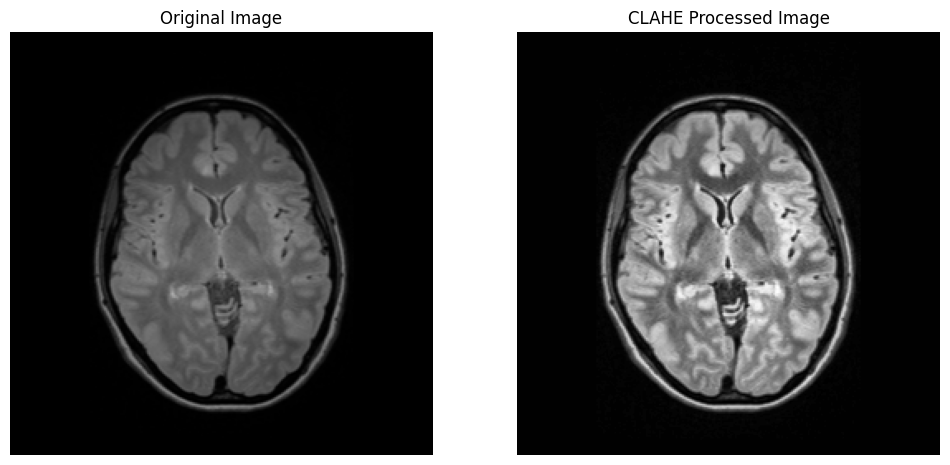

True

In [15]:
# Step 1: Mount your Google Drive (if your dataset is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Unzipping the dataset if necessary (assuming it's in Google Drive)
!unzip '/content/drive/MyDrive/Data.zip' -d /content/data

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 3: Define the function for applying CLAHE
def apply_clahe(image):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a CLAHE object (with optional parameters)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(image)
    return clahe_image

# Step 4: Load a sample image from the dataset
image_path = '/content/data/Data/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_36.tif'
image = cv2.imread(image_path)

# Step 5: Apply CLAHE to the image
clahe_image = apply_clahe(image)

# Step 6: Display the original and CLAHE-processed images for comparison
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# CLAHE processed image
plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Processed Image')
plt.axis('off')

plt.show()

# Step 7: Optionally, save the processed image
output_path = '/content/clahe_processed_image.jpg'
cv2.imwrite(output_path, clahe_image)

In [16]:
import glob
from sklearn.model_selection import train_test_split

# Get all image file paths
image_files = glob.glob('/content/data/Data/**/*_mask.tif', recursive=True)  # Adjust based on your dataset

# Split the dataset into training and testing sets (80% train, 20% test)
train_images, test_images = train_test_split(image_files, test_size=0.2, random_state=42)

print(f'Total images: {len(image_files)}')
print(f'Training images: {len(train_images)}')
print(f'Testing images: {len(test_images)}')

Total images: 3929
Training images: 3143
Testing images: 786


In [17]:
import tensorflow as tf
from tensorflow.keras import layers

def unet_plus_plus(input_shape):
    inputs = tf.keras.Input(input_shape)

    # Example block of a U-Net++ layer (you need to extend it further)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Add more layers...

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(p1)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    return model

# Instantiate the model
input_shape = (256, 256, 1)
model = unet_plus_plus(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,633 (147.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Implementation of Attention U-Net (simplified)
def attention_unet(input_shape):
    inputs = tf.keras.Input(input_shape)

    # Example block of an Attention U-Net layer (expand this further)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Attention mechanisms to enhance the U-Net architecture

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(p1)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    return model

# Instantiate the model
model_attention = attention_unet(input_shape)
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_attention.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,633 (147.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
import os
import cv2
import numpy as np

# Load images and corresponding masks
def load_images_and_masks(image_folder, mask_folder):
    image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.tif') and 'mask' not in f])
    mask_files = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if 'mask' in f])

    images = []
    masks = []

    for img_file, mask_file in zip(image_files, mask_files):
        img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)

        # Resize images and masks if needed
        img = cv2.resize(img, (256, 256))
        mask = cv2.resize(mask, (256, 256))

        # Normalize images and masks
        img = img / 255.0
        mask = mask / 255.0

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load your training and testing datasets
train_images, train_masks = load_images_and_masks('/content/Data', '/content/Data')
test_images, test_masks = load_images_and_masks('/content/Data', '/content/Data')

# Reshape data to have a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
train_masks = np.expand_dims(train_masks, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
test_masks = np.expand_dims(test_masks, axis=-1)

print(f'Train images shape: {train_images.shape}')
print(f'Train masks shape: {train_masks.shape}')

Train images shape: (0, 1)
Train masks shape: (0, 1)


In [25]:
import numpy as np
import cv2
import os

def load_images_and_masks(image_folder, mask_folder):
    image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.tif') and 'mask' not in f])
    mask_files = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if 'mask' in f])

    images = []
    masks = []

    for img_file, mask_file in zip(image_files, mask_files):
        # Load images in grayscale (256, 256)
        img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)

        # Resize if needed
        img = cv2.resize(img, (256, 256))
        mask = cv2.resize(mask, (256, 256))

        # Normalize the images and masks
        img = img / 255.0
        mask = mask / 255.0

        # Add channel dimension
        img = np.expand_dims(img, axis=-1)
        mask = np.expand_dims(mask, axis=-1)

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load training and testing datasets
train_images, train_masks = load_images_and_masks('/content/Data/', '/content/Data/')
test_images, test_masks = load_images_and_masks('/content/Data/', '/content/Data/')

# Reshape for the model
train_images = np.expand_dims(train_images, axis=-1)
train_masks = np.expand_dims(train_masks, axis=-1)

test_images = np.expand_dims(test_images, axis=-1)
test_masks = np.expand_dims(test_masks, axis=-1)

print(train_images.shape)  # Should output (num_samples, 256, 256, 1)
print(train_masks.shape)   # Should output (num_samples, 256, 256, 1)

(0, 1)
(0, 1)


In [26]:
inputs = tf.keras.layers.Input((256, 256, 1))  # Ensure this matches the input shape

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model

# Define the input shape
inputs = Input((256, 256, 1))

# Define the U-Net layers (example)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Continue adding more layers here...

conv_final = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)

# Final output layer for binary segmentation
outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv_final)

# Create the model
model = Model(inputs=[inputs], outputs=[outputs])

# Print model summary to verify
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,561 (291.25 KB)

 Trainable params: 74,561 (291.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Continue building the contracting path (encoder)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# Add more layers as per the U-Net architecture

# Expand the layers (decoder) using upsampling layers
up1 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
up1 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)

# Final layer
outputs = Conv2D(1, (1, 1), activation='sigmoid')(up1)

# Create the model
model = Model(inputs=[inputs], outputs=[outputs])

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Reshape the images and masks
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension for grayscale images
train_masks = np.expand_dims(train_masks, axis=-1)    # Same for masks
test_images = np.expand_dims(test_images, axis=-1)
test_masks = np.expand_dims(test_masks, axis=-1)

# Check the shapes
print(train_images.shape)  # Should output (number_of_samples, 256, 256, 1)
print(train_masks.shape)   # Should output (number_of_samples, 256, 256, 1)

(0, 1, 1)
(0, 1, 1)


In [35]:
train_images, train_masks = load_images_and_masks('/content/Data', '/content/Data')  # Make sure the paths are correct
test_images, test_masks = load_images_and_masks('/content/Data', '/content/Data')

In [37]:
image_folder = '/content/Data/'  # Set the correct path where your images are stored
mask_folder = '/content/Data/'   # Set the correct path where your masks are stored

# Now you can load the files
image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.tif') and 'mask' not in f])
mask_files = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith('.tif') and 'mask' in f])

# Print to check
print("Image files:", image_files)
print("Mask files:", mask_files)

Image files: []
Mask files: []


In [38]:
# Define the paths to the folders
image_folder = '/content/Data'  # Correct path to your unzipped data folder
mask_folder = '/content/Data'   # Correct path for masks

# Now load the image and mask files
image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.tif') and 'mask' not in f])
mask_files = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith('.tif') and 'mask' in f])

# Check if the files are being loaded
print("Image files:", image_files)
print("Mask files:", mask_files)

Image files: []
Mask files: []
